In [6]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline 

sys.path.append('..')
sys.path.append('../src_cython')
from zwatershed import *
from visualization.visualize_funcs import *

path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'

threshes = [500, 1000, 2000]  # for i in range(1,6)]+[i*20000 for i in range(2,16)] # 100...1,000...100,000
iters = [10000]
strs = ["2"]
hdf5_gt_file = path_to_data + 'groundtruth_seg_thick.h5'  # /groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_pred_file = path_to_data + 'tstvol-1_2.h5'  # /tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
out = path_to_data + 'out/'  # '/groups/turaga/home/singhc/evaluation/out/'
save_threshes = threshes
rand = 0
p_small = 180

hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]], dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]], dtype='float32')
aff = aff[:, p_small:(-1 * p_small), p_small:(-1 * p_small), p_small:(-1 * p_small)]

dims = np.array(aff.shape, dtype='uint32')
print 'dims:', aff.shape

# trim gt data - only works for perfect cubes
gt_data_dimension = gt.shape[0]
data_dimension = aff.shape[1]
if gt_data_dimension != data_dimension:
    print("data dimension do not match - clipping GT borders.")
    padding = (gt_data_dimension - data_dimension) / 2
    gt = gt[padding:(-1 * padding), padding:(-1 * padding), padding:(-1 * padding)]
    print"New GT data shape :", gt.shape


nhood = mknhood3d(1)
node1, node2, edge_affs = affgraph_to_edgelist(aff, nhood)
segs, rand = zwatershed_and_metrics(gt, aff, threshes, save_threshes)
# segs = zwatershed(aff, threshes)
# rand = zwatershed_and_metrics_h5(gt, aff, threshes, save_threshes, out)
# zwatershed_h5(aff, threshes, out)

print rand
seg0 = segs[0]
print seg0.shape
NUM = 22
NUM2 = 70
print sum(seg0.flatten()) - 26763581
(x, y, z) = (sum(seg0[0:NUM2, NUM, NUM]) - 458, sum(seg0[NUM, 0:NUM2, NUM])- 239, sum(seg0[NUM, NUM, 0:NUM2]) - 474)
print x, y, z

dims: (3, 72, 72, 72)
data dimension do not match - clipping GT borders.
New GT data shape : (72, 72, 72)
{'V_Rand_merge': [0.9995459965367729, 0.9995421653993543, 0.9994065124554448], 'V_Rand_split': [0.6268154427864256, 0.6468764242084584, 0.6665073262522925], 'V_Rand': 0.7996953347509439}
(72, 72, 72)
2186047
180 205 102


(72, 72, 72) (72, 72, 72, 3) (72, 72, 72)


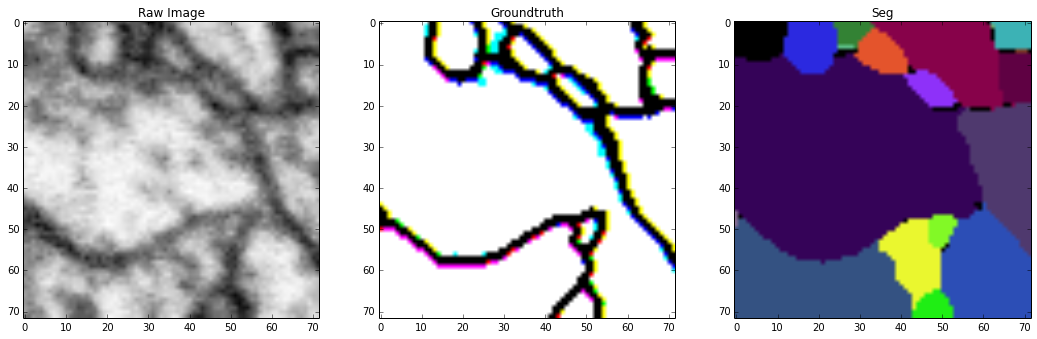

In [2]:
## Open training data and labels
data_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/data/'# 'nobackup/turaga/data/FlyEM/fibsem_medulla_7col/tstvol-520-1/'
os.chdir('/.')
f = h5py.File(data_folder + 'im_uint8.h5', 'r')
im = f[f.keys()[0]] # was 'main'
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g[g.keys()[0]],dtype='float32') #3,z,y,x - was 'main'
label_set = np.transpose(label_set,(1,2,3,0))
# view segs
seg = segs[0]
# im,label_set=trim(im,label_set,seg) 
# seg = seg.transpose((2, 1, 0)).reshape(shape).transpose((2, 1, 0))
im,label_set=trim_arbitrary(im,label_set,seg) 
print im.shape,label_set.shape,seg.shape
# display_seg(im, label_set, seg, im_size=label_set.shape[0], im2_size=seg.shape[0])
display_arbitrary_seg(im, label_set, seg)

In [8]:
print node1, node2, edge_affs
print min(node1),max(node1),min(node2),max(node2),min(edge_affs),max(edge_affs)

[     0      1      2 ..., 373245 373246 373247] [    -1     -1     -1 ..., 373244 373245 373246] [ 0.99993956  0.99982554  0.99956924 ...,  0.99998033  0.99999249
  0.99999642]
0 373247 -1 373246 1.02468e-07 1.0
